## Script to 
1. Plot curve category of each pair (DW, DNW, Hump, Rising) as heatmap

In [59]:
__author__ = 'Aanchal'

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;  sns.set()
import pandas as pd
import FUNCTIONS as f

In [62]:
dataname="CCLE" #"GDSC"#
if (dataname=="GDSC"):
    noe=9
    info_filename="../data/drug_response/GDSC/GDSC_tissue_info(1).csv" # removed other columns and replaced empty cells in "Tissue" column with "UNCLASSIFIED" 
    cell_line_tissue =pd.read_csv(info_filename)
    
    
else:
    noe=8
    info_filename="../data/drug_response/CCLE/CCLE_sample_info_file_2012-10-18_edited.xlsx"
    cell_line_tissue =pd.read_excel(info_filename,sheetname="CCLE_sample_tissue")
    
  

In [63]:
'''[t,t0,t2]=f.getDataObject(dataname,'../data/drug_response/'+dataname+'/'+dataname+'_dose_response_scores.tsv',cl_col_name,drug_col_name,dosage_col_name,response_col_name)
with open("../data_processed/Objects/"+dataname+"_doseResponses.obj","wb") as f:
        pickle.dump(t0, f)
        pickle.dump(t, f)
        pickle.dump(t2, f)'''

with open("../data_processed/Objects/"+dataname+"_doseResponses.obj","rb") as f:
    t0=pickle.load(f)
    t=pickle.load( f)
    t2=pickle.load( f)
    
names=t0
response=t
logDosage=t2 #remove if the below code works fine'''

In [64]:
clnames=names.values[:,0]
drnames=names.values[:,1]
cl_set=(list(sorted(set( clnames ) )))
dr_set=(list(sorted(set( drnames ) )))

#print(dr_set, names.values[:,1])cell_line_tissue = pd.read_excel(info_filename,sheetname="CCLE_sample_tissue")

In [65]:
tissueType=[]
for i in range(len(cl_set)):
    ind=np.where(cell_line_tissue.values[:,0]==cl_set[i] )[0]
    
    tissueType.append( cell_line_tissue.values[ ind , 1 ][0] )

In [66]:

drug_map= pd.read_csv("../data_processed/CurveCategoryDetection/"+dataname+"_OutliersPerDrug.tsv", sep='\t')
cl_map=   pd.read_csv("../data_processed/CurveCategoryDetection/"+dataname+"_OutliersPerCellLine.tsv", sep='\t')


In [67]:
category_df=pd.read_csv("../data_processed/CurveCategoryDetection/"+dataname+"_CurveCategory.tsv", sep='\t', index_col=0)
category_matrix=category_df.values



category_df.to_csv("../data_processed/CurveCategoryDetection/"+dataname+"_CurveCategory.tsv", sep='\t')

In [68]:
lut = dict(zip(set( tissueType), sns.hls_palette(len(set( tissueType)), l=0.5, s=0.8)))

row_colors1=pd.DataFrame( tissueType)[0].map(lut) 
row_colors1.index=cl_set


0


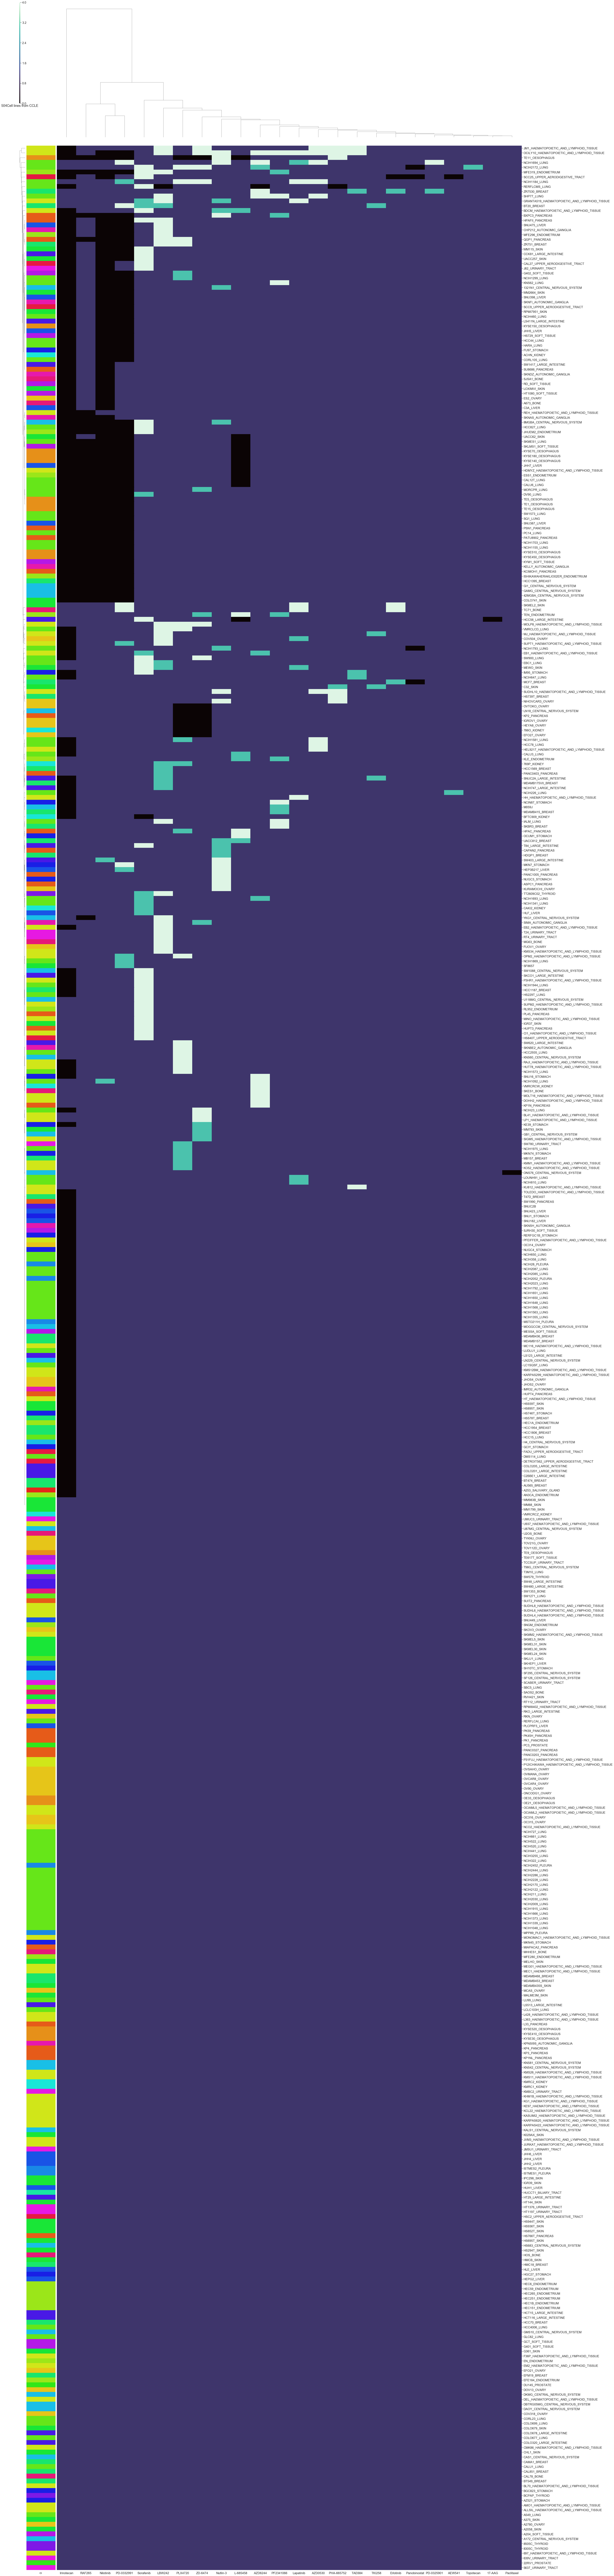

In [69]:
#fig, ax1 = plt.subplots(figsize=(len(dr_set),len(cl_set)))

print(len(np.where(category_matrix==2)[0]))
sns.set(font_scale=1.5)
bx = sns.clustermap(category_df,  cmap="mako", figsize=(2*len(dr_set),len(cl_set)/2), row_colors=row_colors1  ,col_cluster=True, row_cluster=True, metric='jaccard')
#plt.xlabel("Drugs in "+dataname+" dataset")
plt.xlabel(str(len(cl_set))+"Cell lines from "+dataname)
plt.savefig("../figures/CategorizeCurves/"+dataname+"_CurveCategoryHeatmap.svg", bbox_inches='tight')
plt.savefig("../figures/CategorizeCurves/"+dataname+"_CurveCategoryHeatmap.png", bbox_inches='tight')
plt.savefig("../figures/CategorizeCurves/"+dataname+"_CurveCategoryHeatmap.pdf", bbox_inches='tight')

Text(0.5, 733.21691276178, '504Cell lines from CCLE')

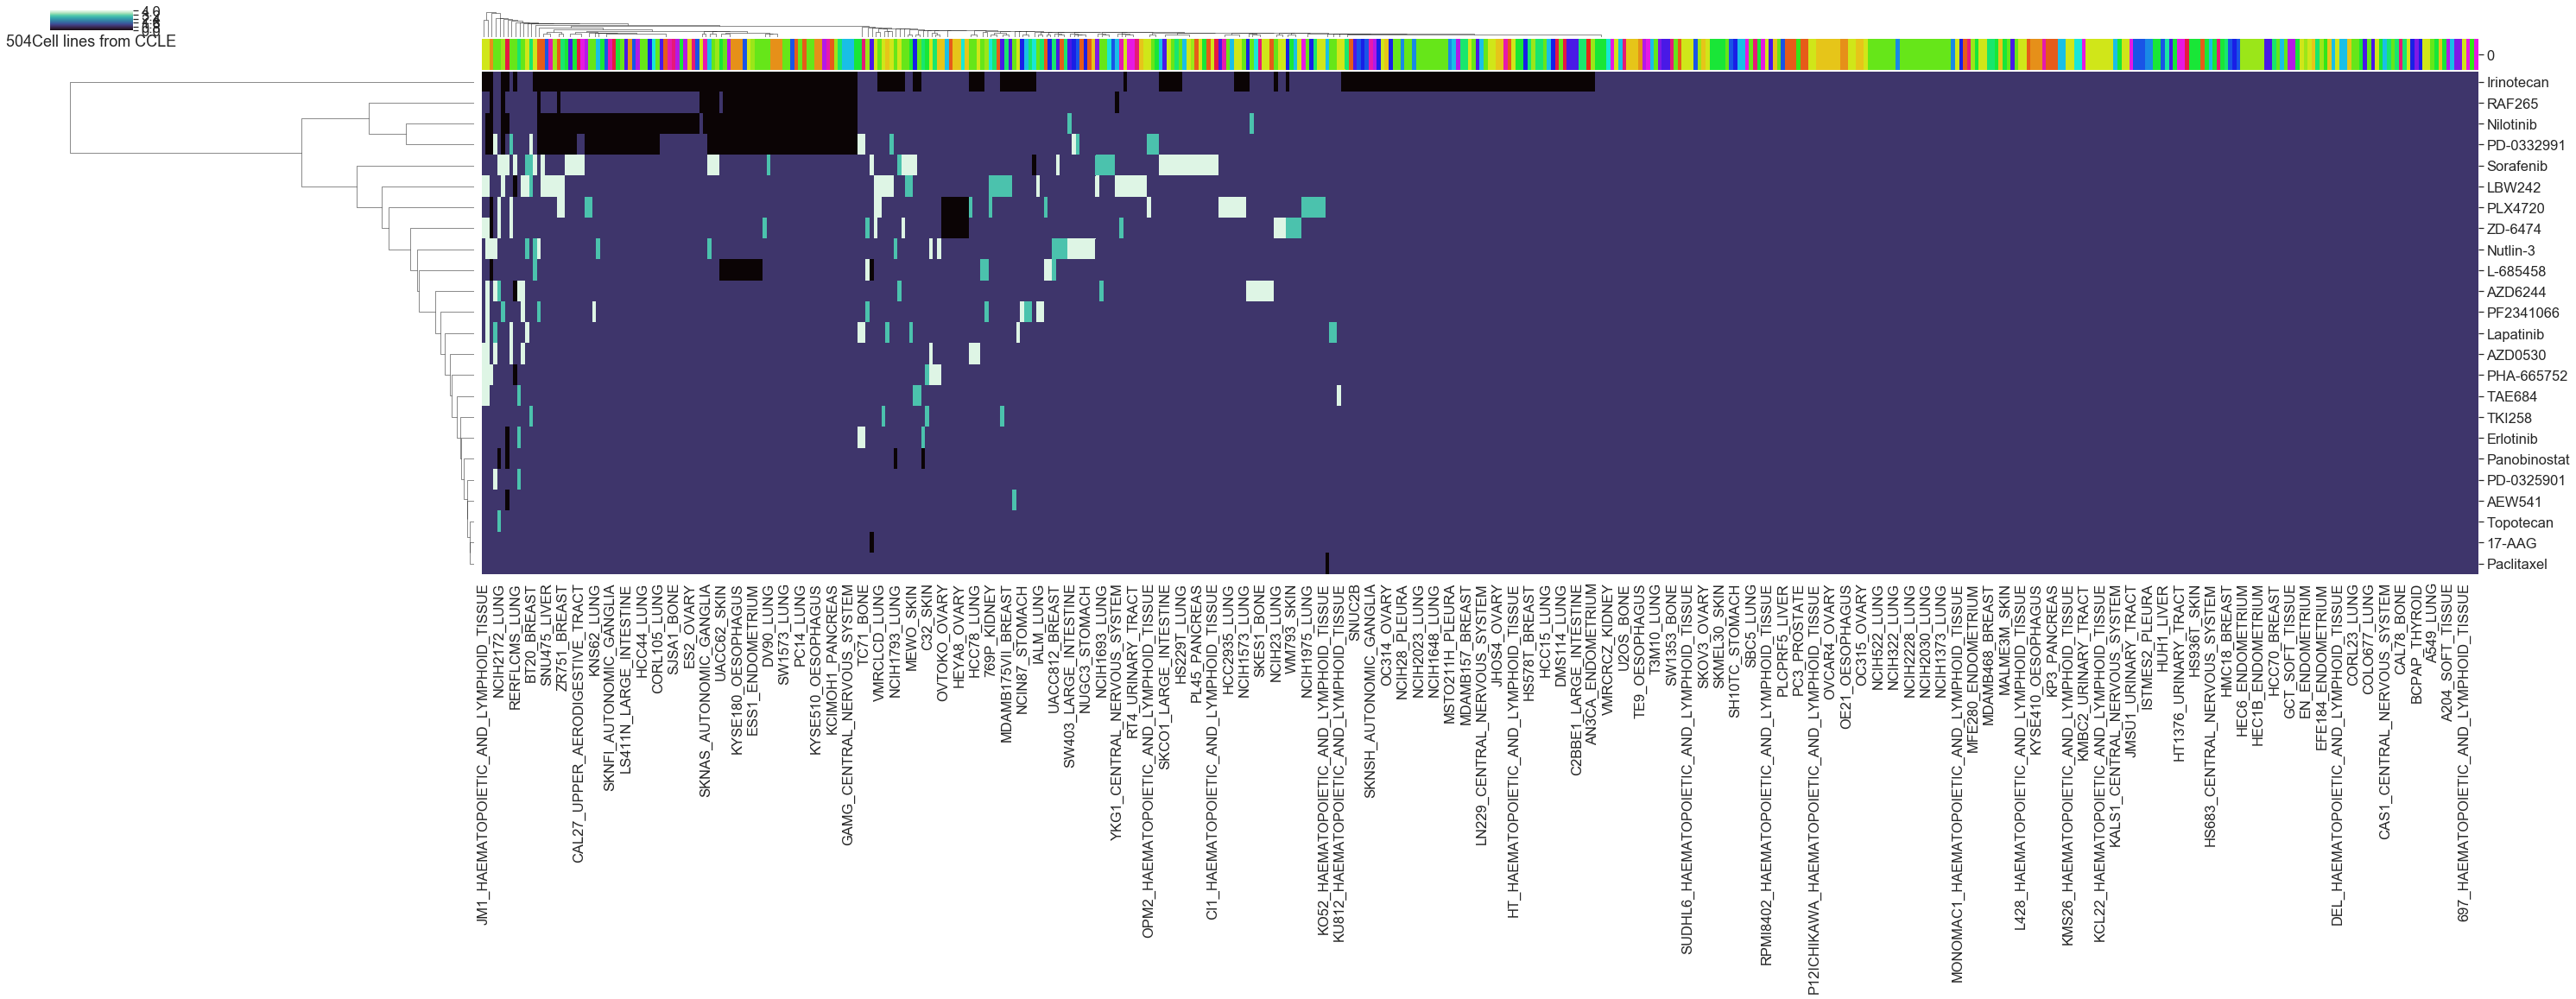

In [70]:
category_df=pd.DataFrame(category_matrix.T)
category_df.index=np.array(dr_set)
category_df.columns=np.array(cl_set)#np.arange(len(cl_set))#np.array(cl_set)
#category_df.to_csv("../data_processed/CurveCategoryDetection/"+dataname+"_CurveCategory_T.tsv", sep='\t')


sns.set(font_scale=1.5)

bx = sns.clustermap(category_df,  cmap="mako", figsize=(len(cl_set)/10,len(dr_set)/2), col_colors=row_colors1 ,col_cluster=True, row_cluster=True, metric='jaccard')#,xticklabels=False)
plt.xlabel(str(len(cl_set))+"Cell lines from "+dataname)
#plt.savefig("../figures/CategorizeCurves/"+dataname+"_CurveCategoryHeatmap_T_bothcluster.svg", bbox_inches='tight')
#plt.savefig("../figures/CategorizeCurves/"+dataname+"_CurveCategoryHeatmap_T_bothcluster.png", bbox_inches='tight')
#plt.savefig("../figures/CategorizeCurves/"+dataname+"_CurveCategoryHeatmap_T_bothcluster.pdf", bbox_inches='tight')